In [95]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import os
DATA_PREFIX = '/mnt/data/jemmons/machine-feature-codec/results/cifar10/lossy-compression'

In [96]:
import matplotlib.pyplot as plt

def make_plots(logfile_csv):
    
    _title_path = os.path.basename(os.path.dirname(logfile_csv))
    
    with open(logfile_csv, 'r') as f:
        lines = f.read().strip().split('\n')
        lines = list(filter(lambda x : '#' not in x, lines))
        lines = lines[1:]
        
        _epochs = []
        _train_top1 = []
        _train_loss = []
        _test_top1 = []
        _test_loss = []
        _checkpoint_files = []
        for line in lines:
            epoch, \
            train_top1, \
            train_loss, \
            test_top1, \
            test_loss, \
            checkpoint_file = line.split(',')

            _epochs.append(int(epoch))
            _train_top1.append(float(train_top1))
            _train_loss.append(float(train_loss))
            _test_top1.append(float(test_top1))
            _test_loss.append(float(test_loss))
            _checkpoint_files.append(checkpoint_file)

        print('top training accuracy: {}'.format(max(_train_top1)))
        print('top validation accuracy: {}'.format(max(_test_top1)))
            
        fig = plt.figure(figsize=(10, 5))
        fig.clear()
        
        ax1 = fig.add_subplot(121)
        ax1.set_ylim([0,1.05])
        ax1.set_title('Training Top-1\n{}'.format(_title_path))
        ax1.set_xlabel('Epoch')
        ax1.set_ylabel('Accuracy (top-1)')
        ax1.plot(_epochs, _train_top1, color="#000000", ls="-", marker="o")
        ax1.plot(_epochs, _test_top1, color="#008080", ls="-", marker="o")

        ax2 = fig.add_subplot(122)
        ax2.set_ylim([0, 1.05])
        ax2.set_title('Training Loss\n {}'.format(_title_path))
        ax2.set_xlabel('Epoch')
        ax2.set_ylabel('Loss')
        
        normalized_train_loss = list(map(lambda x: x / max(_train_loss), _train_loss))
        normalized_test_loss = list(map(lambda x: x / max(_test_loss), _test_loss))
        ax2.plot(_epochs, normalized_train_loss, color="#000000", ls="-", marker="o")
        ax2.plot(_epochs, normalized_test_loss, color="#008080", ls="-", marker="o")
        
def summarize_accuracy(filenames, x_labels):
    
    data = []
    for filename in filenames:
        with open(filename, 'r') as f:
            lines = f.read().strip().split('\n')
            lines = list(filter(lambda x : '#' not in x, lines))
            lines = lines[1:]

            _epochs = []
            _train_top1 = []
            _train_loss = []
            _test_top1 = []
            _test_loss = []
            _checkpoint_files = []
            for line in lines:
                epoch, \
                train_top1, \
                train_loss, \
                test_top1, \
                test_loss, \
                checkpoint_file = line.split(',')

                _epochs.append(int(epoch))
                _train_top1.append(float(train_top1))
                _train_loss.append(float(train_loss))
                _test_top1.append(float(test_top1))
                _test_loss.append(float(test_loss))
                _checkpoint_files.append(checkpoint_file)

            data.append({
                'epochs' : _epochs,
                'train_top1' : _train_top1,
                'train_loss' : _train_loss,
                'test_top1' : _test_top1,
                'test_loss' : _test_loss,
                'checkpoint_files' : _checkpoint_files
            })
    
    top_train_acc = []
    top_validation_acc = []
    for d in data:
        #top_train_acc.append(max(d['train_top1']))
        #top_validation_acc.append(max(d['test_top1']))
        top_train_acc.append(d['train_top1'][-1])
        top_validation_acc.append(d['test_top1'][-1])
        
    fig = plt.figure(figsize=(5, 5))
    fig.clear()
        
    ax1 = fig.add_subplot(111)
    ax1.set_ylim([.60,1.05])
    ax1.set_xlim([.8,150])
    ax1.set_title('Training Top-1\n(cifar10 dataset; resnet18-like architecture)')
    ax1.set_xlabel('compaction_factor')
    ax1.set_ylabel('accuracy (top-1)')
    ax1.set_xscale("log", nonposx='clip')
    l1 = ax1.plot(x_labels, top_train_acc, color="#000000", ls="-", marker="o",label='train_accuracy')
    l2 = ax1.plot(x_labels, top_validation_acc, color="#008080", ls="-", marker="o", label='validation_accuracy')
    for i,j in zip(x_labels,top_validation_acc):
        ax1.annotate(str(round(j,2)),xy=(min(i, 85),max(j+.01, 0.61)))
    ax1.legend(loc='lower left', shadow=True)

In [97]:
import subprocess
print(subprocess.check_output(['cat', '/home/jemmons/projects/machine-feature-codec/scratch/cifar10/data/compress_data_summary.json']).decode())


{
    "100" : "1355.28",
    "80" : "542.889",
    "60" : "437.91",
    "50" : "410.314",
    "40" : "384.368",
    "35" : "371.579",
    "30" : "356.228",
    "25" : "339.652",
    "20" : "385.073",
    "15" : "428.393",
    "10" : "403.165"
}



top training accuracy: 0.6393
top validation accuracy: 0.6355


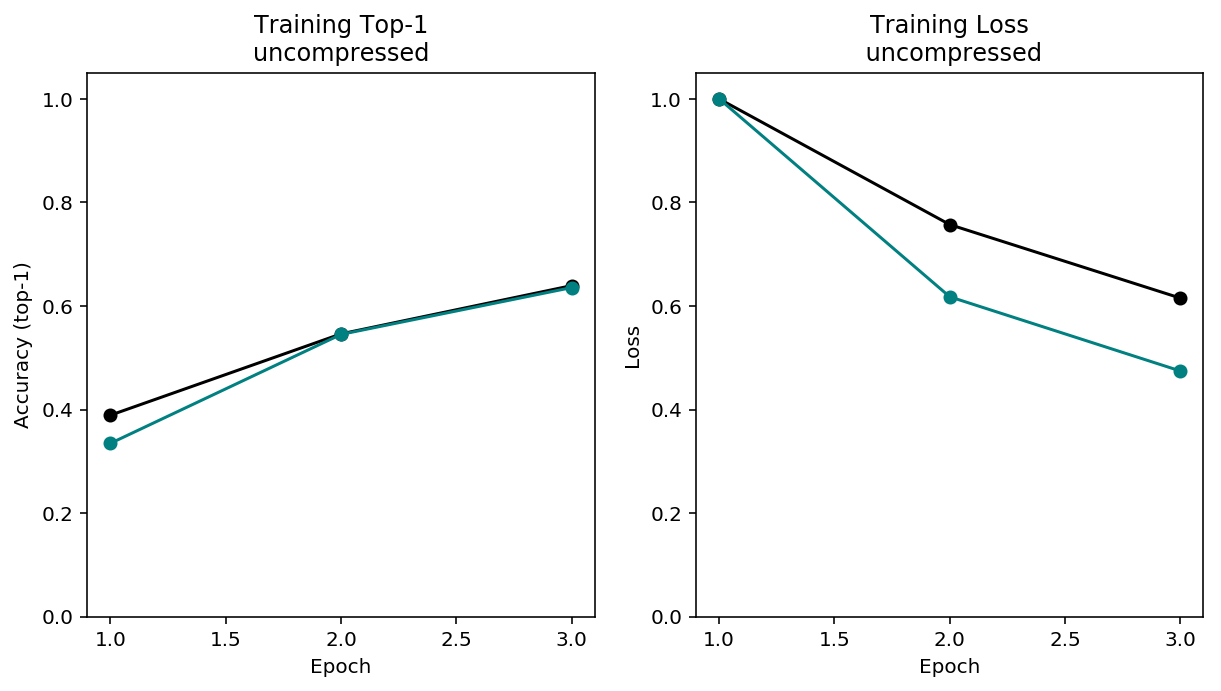

In [98]:
results_dir = 'uncompressed'
path = os.path.join(DATA_PREFIX, results_dir, 'training_log.csv')
make_plots(path)

top training accuracy: 0.67114
top validation accuracy: 0.6321


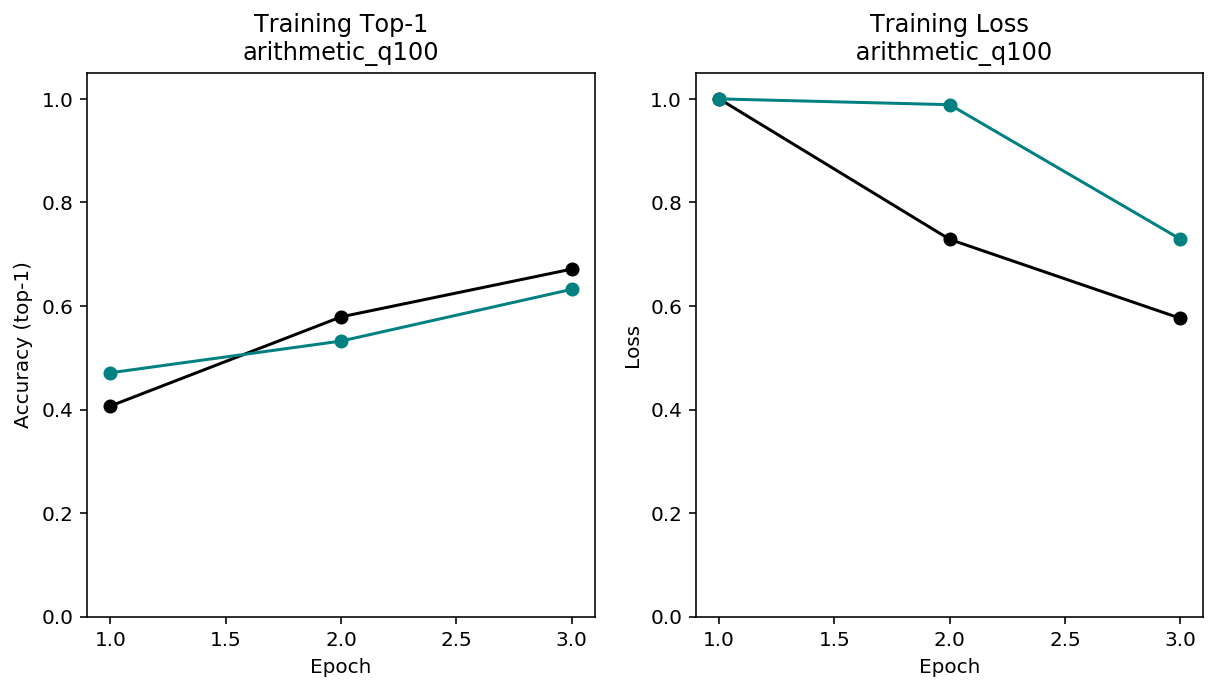

In [99]:
results_dir = 'arithmetic_q100'
path = os.path.join(DATA_PREFIX, results_dir, 'training_log.csv')
make_plots(path)

top training accuracy: 0.6227
top validation accuracy: 0.5886


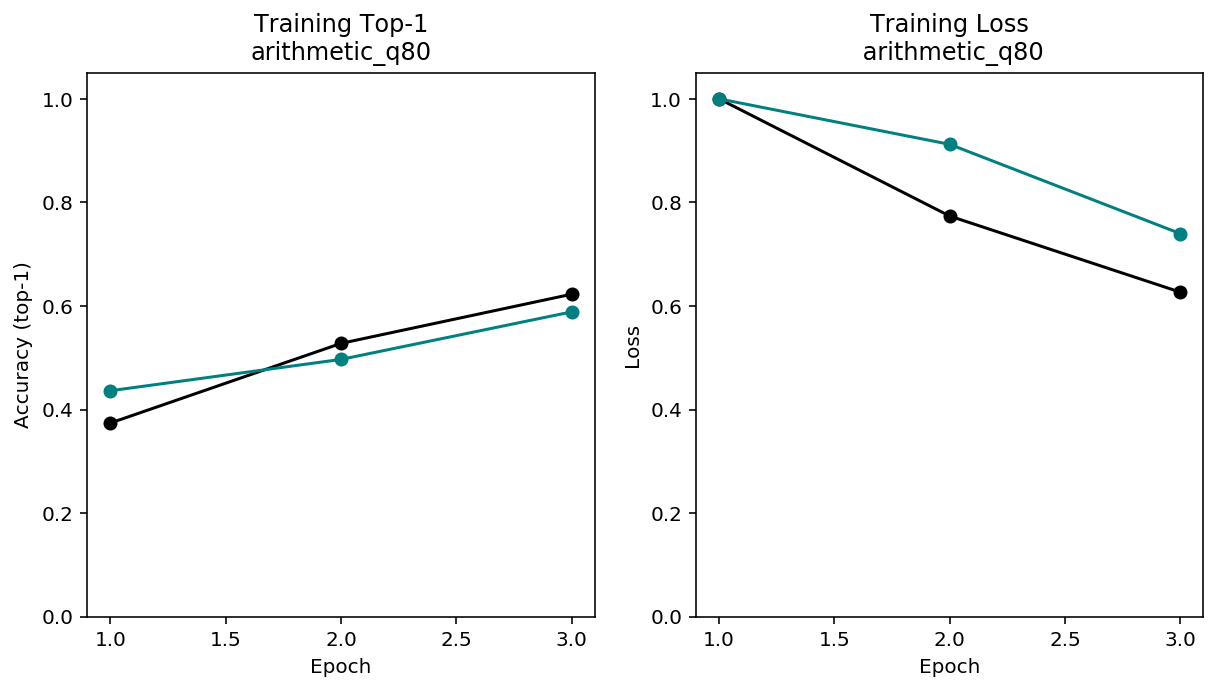

In [100]:
results_dir = 'arithmetic_q80'
path = os.path.join(DATA_PREFIX, results_dir, 'training_log.csv')
make_plots(path)

top training accuracy: 0.6297
top validation accuracy: 0.5449


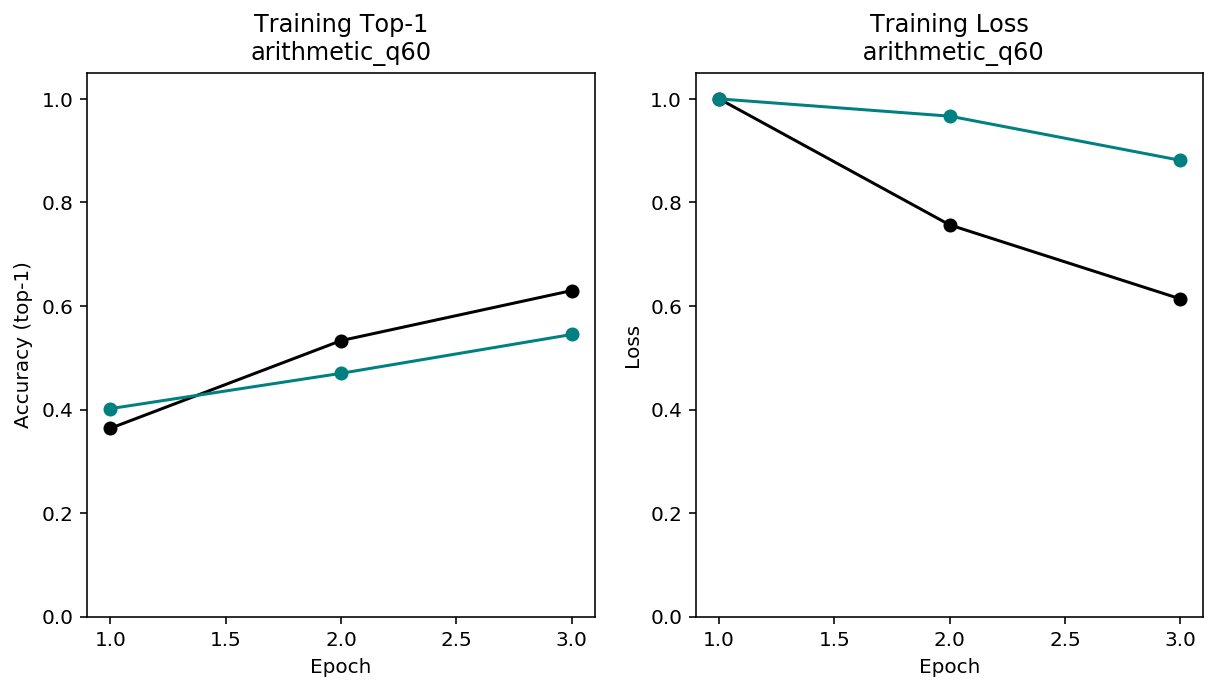

In [101]:
results_dir = 'arithmetic_q60'
path = os.path.join(DATA_PREFIX, results_dir, 'training_log.csv')
make_plots(path)